# PyTorch workflow(end-to-end)

1. data preparation and loading

2. creating/building a model

3. fitting the model to data (training)

4. making predictions 

5. evaluating a model (inference)

6. improve model/experimentation (optional step)

7. saving and loading a model 

In [3]:
import torch
from torch import nn   # nn contains all of the PyTorch's building blocks for neural networks


import matplotlib.pyplot as plt


#check PyTorch version
torch.__version__

'1.13.0+cpu'

# 1. Data preparation / loading

Data can be almost anything... in ML:

Excel spreadsheets

Images of any kind

videos (youTube has lot of data)

Audio like songs or podcasts

DNA

Text

ML is a game of two parts:

1. Get data into a numerical representation

2. Build a model to learn patterns in that numerical representation.

In [4]:
# here, let's create some known data using the linear regression formula (y = mx+b).

# we will use a linear regression formula to make a straight line with known parameters.

# creating known parameters
weight =0.7
bias = 0.3 

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

Y = weight * X + bias

In [6]:
X[:5]       ,     Y[:5]     

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [7]:
 len(X)   ,  len(Y)

(50, 50)

In [15]:
X.shape     ,   Y.shape 

(torch.Size([50, 1]), torch.Size([50, 1]))

In [39]:
# train_test_split approach

from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.2,shuffle= True,random_state=42)

len(x_train_1)  ,  len(y_train_1) , len(x_test_1) , len(y_test_1)

(40, 40, 10, 10)

In [20]:
# KFold approach
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
  #  print("TRAIN:", train_index, "TEST:", test_index)
  x_train_2 , x_test_2 = X[train_index] , X[test_index]
  y_train_2 , y_test_2 = Y[train_index] , Y[test_index]

In [17]:
len(train_index)  , len(test_index) 

(42, 8)

In [23]:
len(x_train_2)  ,  len(y_train_2) , len(x_test_2) , len(y_test_2)

(42, 42, 8, 8)

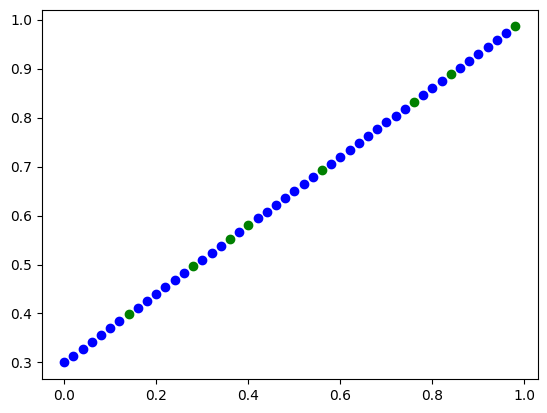

In [27]:
plt.scatter(x_train_2 , y_train_2 , c='b' , label='train data')

plt.scatter(x_test_2, y_test_2, c='g' , label='test data')

In [28]:
def plot_predictions(train_data=x_train_2,train_labels=y_train_2,
                     test_data=x_test_2 , test_labels=y_test_2,
                     predictions=None):
    """ ploting train data ,test data and predictions for comparison """
    plt.figure(figsize=(10,7))
    
    #plotting training data
    plt.scatter(train_data , train_labels , c='b' , s=4, label='train data')
    
    #plotting test data
    plt.scatter(test_data , test_labels , c='g' , s=4, label='test data')
    
    #are there predictions?
    if predictions is not None:
        plt.scatter(test_data , predictions, c='r' , s=4 , label='predictions')
    #show the legend
    plt.legend(prop = {"size":14})

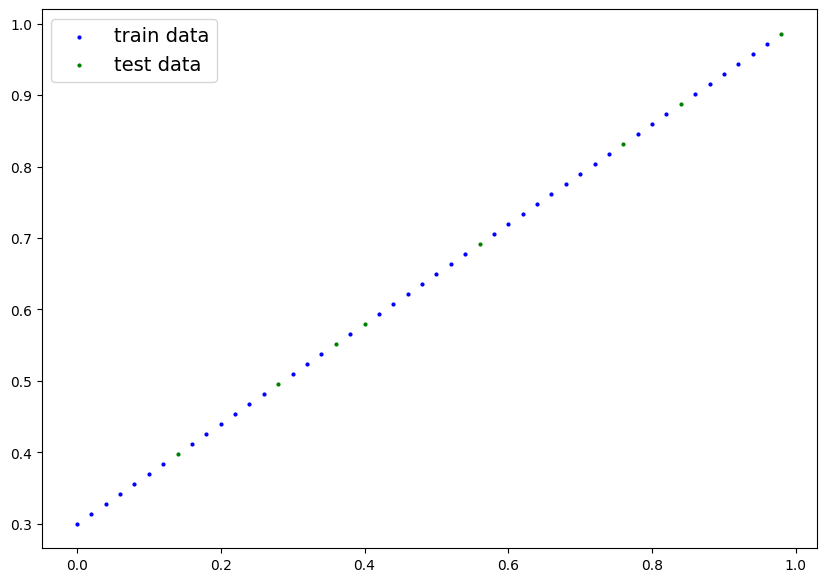

In [29]:
plot_predictions()

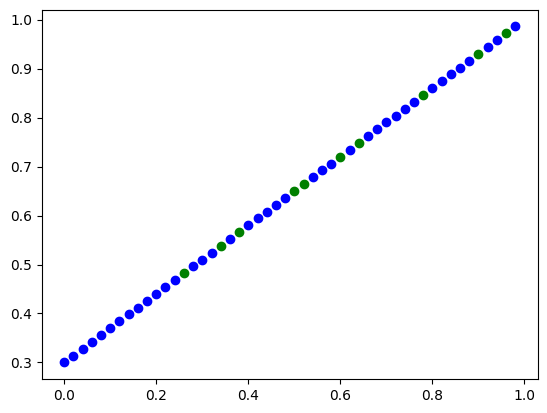

In [40]:
plt.scatter(x_train_1 , y_train_1 , c='b' , label='train data')

plt.scatter(x_test_1, y_test_1, c='g' , label='test data')

# 2. Building model

In [42]:
# create linear regression model
class LinearRegressionModel(nn.Module):    # almost everything in PyTorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        #forward method to define the computation in the model
        def forward(self, x: torch.tensor) -> torch.tensor:
            return self.weights * x + self.bias
    
